## Read wind speed and direction from the input file 

In [1]:
import plotly.express as px
import plotly.io as pio

# Configure Plotly to work in Jupyter Notebooks
pio.renderers.default = 'notebook'

In [2]:
# Load a MATLAB file and convert the time to Python datetime objects
import scipy.io
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Load the MATLAB file
mat = scipy.io.loadmat('TerminosViento.mat')

# Extract time, U, and V components
matlab_time = mat['Time'].flatten()  # Assuming 'time' is a 1D array
U = mat['XX'].flatten()              # Assuming 'XX' is a 1D array
V = mat['YY'].flatten()              # Assuming 'YY' is a 1D array

# Convert MATLAB time to Python datetime
python_time = [datetime.fromordinal(int(t)) + timedelta(days=t%1) - timedelta(days=366) for t in matlab_time]

# Convert datetime objects to matplotlib date format
python_time_num = [mdates.date2num(t) for t in python_time]

# Convert MATLAB time to Python datetime
python_time = [datetime.fromordinal(int(t)) + timedelta(days=t%1) - timedelta(days=366) for t in matlab_time]

# Create a DataFrame
df = pd.DataFrame({'time': python_time, 'U': U, 'V': V})


## Calculate the resultant wind speed and direction. The wind direction is going towards (oceanographic convention)

In [3]:
# Add the units to the U and V components to calculate wind speed and direction using metpy

from metpy.calc import wind_direction, wind_speed
from metpy.units import pandas_dataframe_to_unit_arrays

# Define units for U and V components
wind_units = {'U': 'm/s', 'V': 'm/s'}

# Convert the DataFrame to unit arrays
unit_arrays = pandas_dataframe_to_unit_arrays(df, column_units=wind_units)

# Calculate wind speed and direction using metpy
unit_arrays['wind_speed_m_s'] = wind_speed(unit_arrays['U'], unit_arrays['V'])
unit_arrays['wind_direction_degree'] = wind_direction(unit_arrays['U'], 
                                               unit_arrays['V'], 
                                               convention= "to" ) # ‘to’ returns the direction the wind is going towards (oceanographic convention)

# Add wind direction and speed back to the DataFrame
df['wind_direction_degree'] = unit_arrays['wind_direction_degree'].magnitude
df['wind_speed_m_s'] = unit_arrays['wind_speed_m_s'].magnitude



## Plot wind direction  and wind speed histogram.

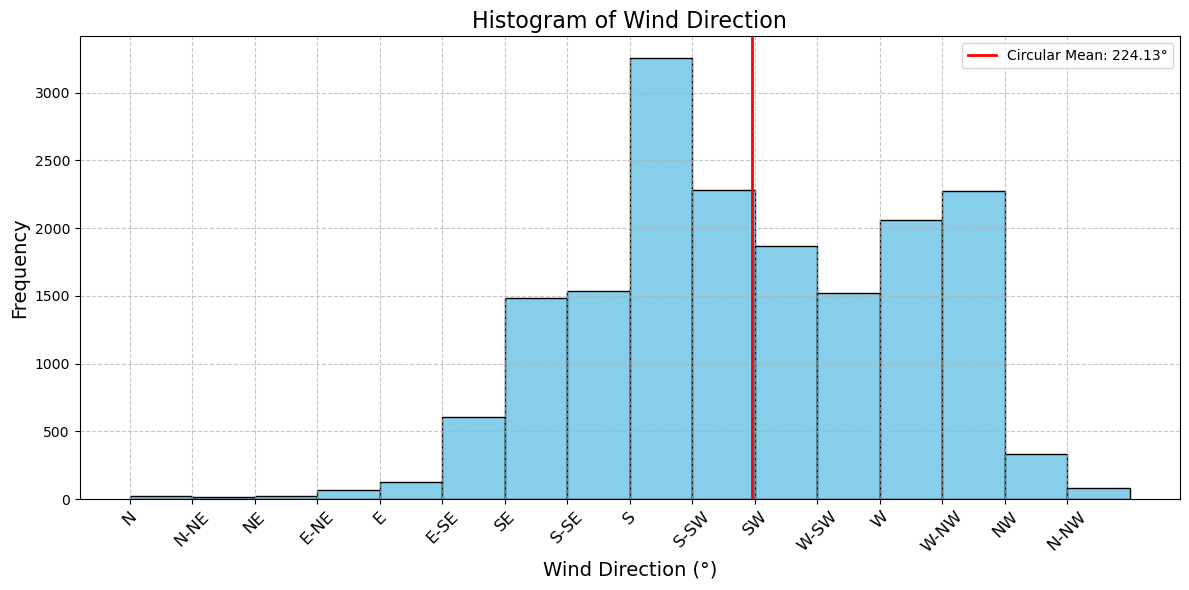

In [4]:
# Plot histogram for wind direction including circular mean
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import circmean, circvar, circstd

# Assuming unit_arrays['wind_direction_degree'] is already defined and contains the wind direction data in degrees

# Calculate circular statistics for wind direction
circular_mean = circmean(unit_arrays['wind_direction_degree'], high=360, low=0)


# Plot histogram for wind direction
plt.figure(figsize=(12, 6))
plt.hist(unit_arrays['wind_direction_degree'], bins=np.arange(0, 361, 22.5), edgecolor='black', color='skyblue')
xlabels = (
    "N", "N-NE", "NE", "E-NE", "E", "E-SE", "SE", "S-SE", 
    "S", "S-SW", "SW", "W-SW", "W", "W-NW", "NW", "N-NW"
)
xticks = np.arange(0, 360, 22.5)
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xlabels, rotation=45, fontsize=12)
plt.xlabel('Wind Direction (°)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Wind Direction', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot circular mean
plt.axvline(circular_mean, color='red', linestyle='-', linewidth=2, label=f'Circular Mean: {circular_mean:.2f}°')

# Add legend
plt.legend(loc='upper right')

plt.tight_layout()

# Save the figure in high resolution
plt.savefig('wind_direction_histogram.png', dpi=300)

plt.show()

In [5]:
# Calculate circular statistics for wind direction
from scipy.stats import circmean, circvar, circstd

circular_mean = circmean(unit_arrays['wind_direction_degree'], high=360, low=0)
circular_variance = circvar(unit_arrays['wind_direction_degree'], high=360, low=0)
circular_std = circstd(unit_arrays['wind_direction_degree'], high=360, low=0)

print( f'Circular Mean: {circular_mean:.2f}°')
print( f'Circular Variance: {circular_variance:.2f}°')
print( f'Circular Standard Deviation: {circular_std:.2f}°') 

Circular Mean: 224.13°
Circular Variance: 0.40°
Circular Standard Deviation: 58.37°


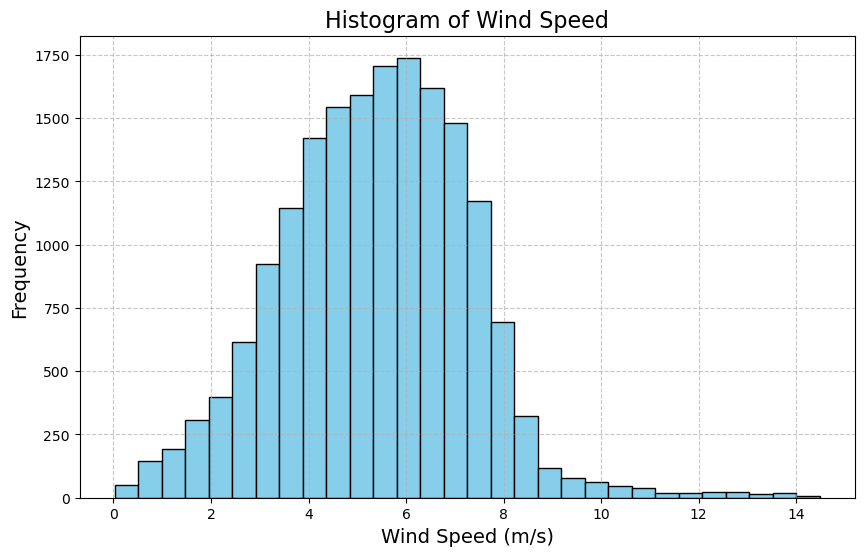

In [6]:
# Plot histogram of wind speed
plt.figure(figsize=(10, 6))
plt.hist(df['wind_speed_m_s'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Wind Speed', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Plot windrose diagram.


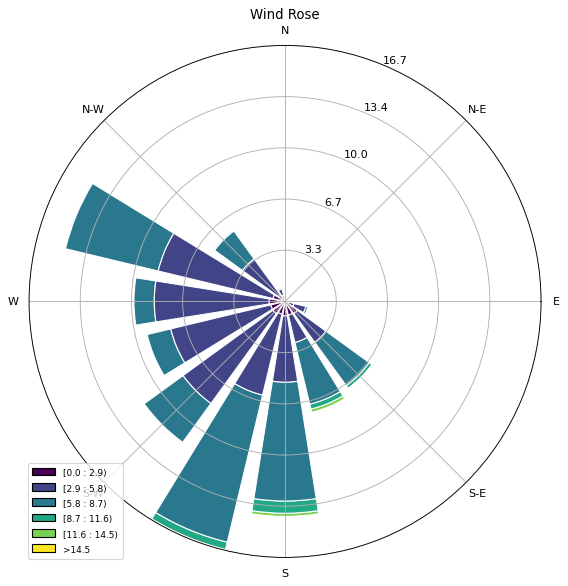

In [7]:
from windrose import WindroseAxes
from matplotlib import cm

wind_direction = df['wind_direction_degree']  # Replace with your actual data
wind_speed = df['wind_speed_m_s']  # Replace with your actual data

ax = WindroseAxes.from_ax()

ax.bar(
    wind_direction, wind_speed, normed=True,
    edgecolor='white')  
    

ax.set_legend()

ax.set_title("Wind Rose")

plt.show()


